# Apartment Price in Victoria
## by Febi Andika Dani Fajar Suryawan

## Background
Tony who has profession as a broker wants to predict apartment price in Victoria based on living area environment and apartment conservation status. Determine the best model to predict and redefine new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A.
<br>
The Dataset provides living area and conservation status. There are 218 observations and 16 variables.

## Import Library

In [1]:
# Import library 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 1. Import Dataset: Load the Dataset

In [2]:
# Load the Dataset
data = pd.read_csv("victoria.csv")
data = data.drop("row.labels", axis = 1)
data.head()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,228000.0,7.531000e+09,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,409000.0,1.006500e+09,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,200000.0,8.887000e+09,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,180000.0,6.261000e+09,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,443600.0,1.461500e+09,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [3]:
# Show dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 15 columns):
totalprice        218 non-null float64
area              218 non-null float64
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 25.6+ KB


### Change Conservation Variable

In [4]:
# Add new column named "newconservation" to change conservation column
data["newconservation"] = np.where(data["conservation"]=="1A", "A",np.where(data["conservation"]=="2A", "B", "C"))
data = data.drop("conservation", axis = 1)
data.head()

,totalprice,area,zone,category,age,floor,rooms,out,toilets,garage,elevator,streetcategory,heating,tras,newconservation
0,228000.0,7.531000e+09,Z45,4B,33,3,5,E100,1,0,1,S3,3A,0,C
1,409000.0,1.006500e+09,Z31,3B,5,7,5,E50,2,1,1,S5,4A,1,A
2,200000.0,8.887000e+09,Z52,3A,14,8,5,E50,2,0,1,S2,3A,0,A
3,180000.0,6.261000e+09,Z62,4A,41,3,4,E50,1,0,0,S3,1A,0,B
4,443600.0,1.461500e+09,Z31,3A,22,6,7,E100,2,0,1,S4,4A,1,A


In [5]:
data_conservation = data["newconservation"].value_counts()
data_conservation.head()

A    161
C     39
B     18
Name: newconservation, dtype: int64

### Separate Categorical and Numerical Features

### Categorical Data

In [6]:
# Grouping variable with categorical type data
data_categorical = ["zone", "category", "out", "garage", "elevator", "streetcategory", "heating", "tras", "newconservation"]
data_categorical = data[data_categorical]
data_categorical.head()

,zone,category,out,garage,elevator,streetcategory,heating,tras,newconservation
0,Z45,4B,E100,0,1,S3,3A,0,C
1,Z31,3B,E50,1,1,S5,4A,1,A
2,Z52,3A,E50,0,1,S2,3A,0,A
3,Z62,4A,E50,0,0,S3,1A,0,B
4,Z31,3A,E100,0,1,S4,4A,1,A


### Numerical Data

In [7]:
# Grouping variable with numerical type data
data_numerical = data.drop(data_categorical, axis = 1)
data_numerical.head()

,totalprice,area,age,floor,rooms,toilets
0,228000.0,7.531000e+09,33,3,5,1
1,409000.0,1.006500e+09,5,7,5,2
2,200000.0,8.887000e+09,14,8,5,2
3,180000.0,6.261000e+09,41,3,4,1
4,443600.0,1.461500e+09,22,6,7,2


## 2. Exploratory Data Analysis

In [11]:
# Show summary of numerical type data (mean, median, max, min, Q1, and Q3) 
data_numerical.describe()

,totalprice,area,age,floor,rooms,toilets
count,218.000000,2.180000e+02,218.000000,218.000000,218.000000,218.000000
mean,280741.523853,5.718657e+09,19.899083,4.440367,4.853211,1.467890
std,69298.459358,3.455007e+09,14.595590,2.126988,0.634285,0.500116
min,155000.000000,5.300000e+01,1.000000,1.000000,3.000000,1.000000
25%,228500.000000,1.187250e+09,11.000000,3.000000,5.000000,1.000000
50%,269750.000000,7.118500e+09,16.000000,4.000000,5.000000,1.000000
75%,328625.000000,8.542750e+09,24.000000,5.000000,5.000000,2.000000
max,560000.000000,9.992000e+09,118.000000,12.000000,7.000000,2.000000


In [9]:
# Show summary of categorical type data (modus) 
data.describe(include=object)

,zone,category,out,streetcategory,heating,newconservation
count,218,218,218,218,218,218
unique,23,7,4,4,4,3
top,Z41,3B,E100,S3,3A,A
freq,18,77,122,107,149,161


## 3. Data Visualization

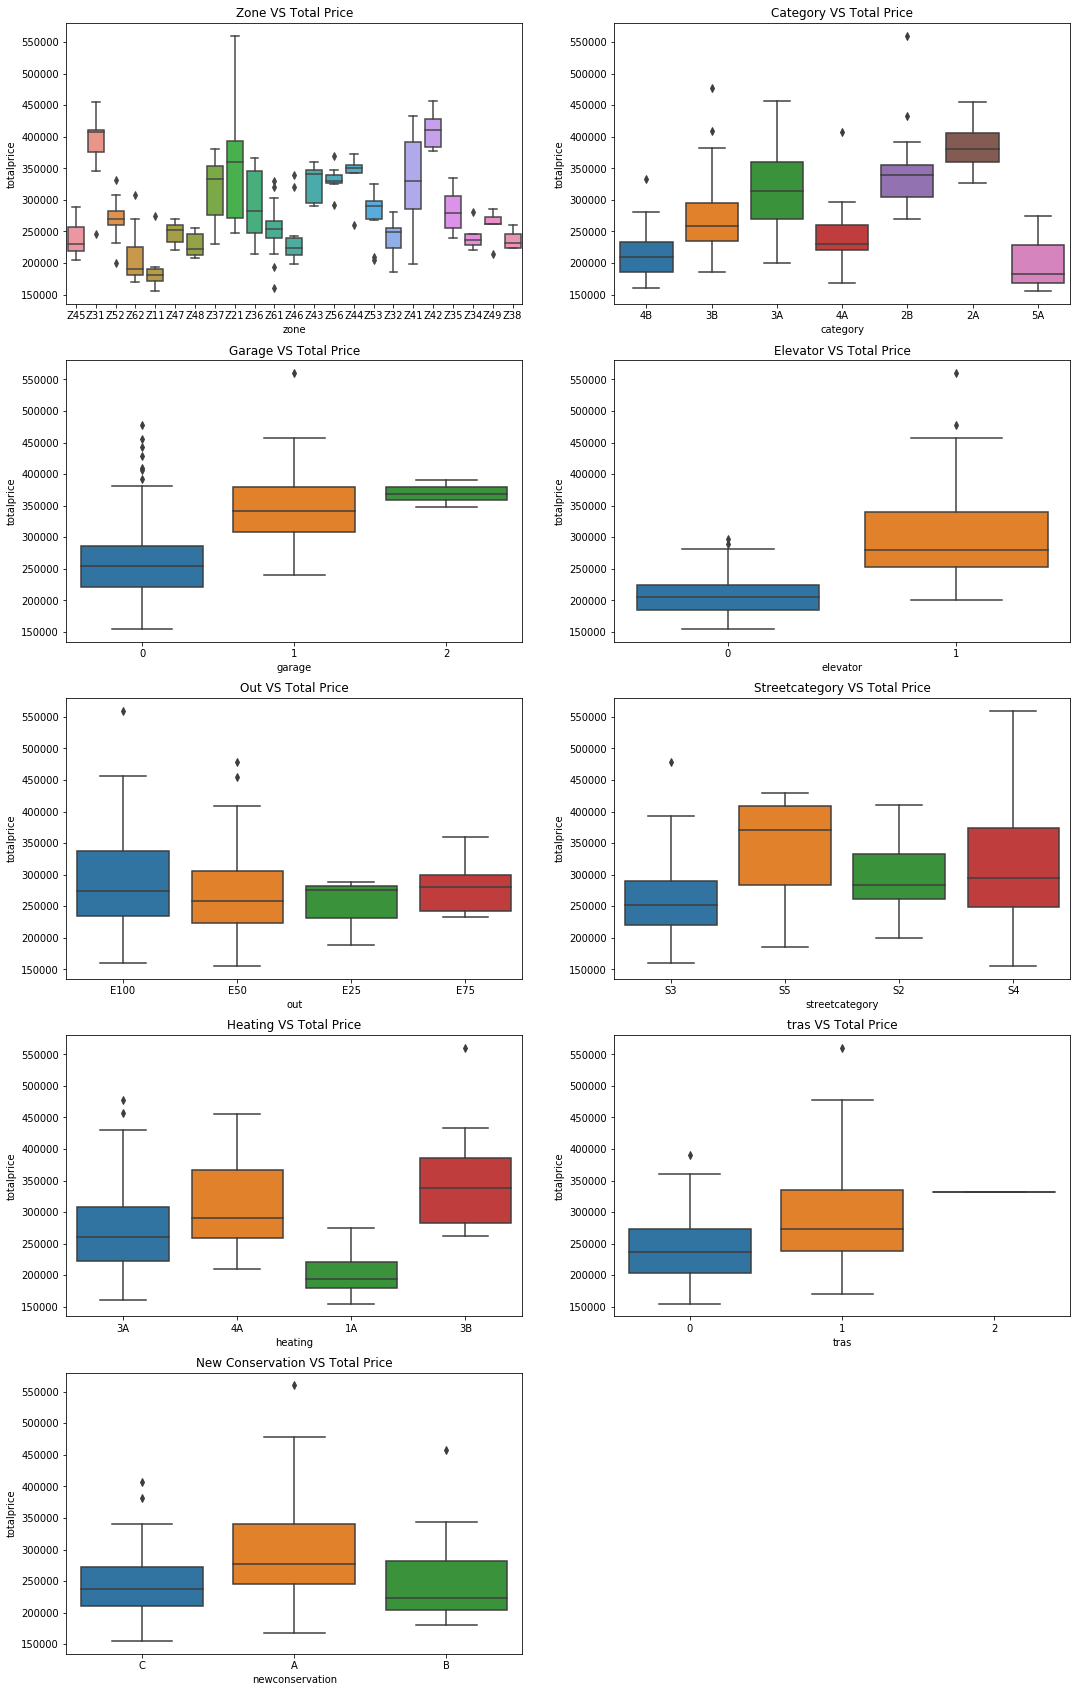

In [13]:
# Make visualization between each variable vs totalprice variable
fig = plt.figure(figsize = (18, 30))

fig.add_subplot(5,2,1)
ax = sns.boxplot(x = "zone", y = "totalprice", data = data)
plt.title("Zone VS Total Price")

fig.add_subplot(5,2,2)
ax = sns.boxplot(x = "category", y = "totalprice", data = data)
plt.title("Category VS Total Price")

fig.add_subplot(5,2,3)
ax = sns.boxplot(x = "garage", y = "totalprice", data = data)
plt.title("Garage VS Total Price")

fig.add_subplot(5,2,4)
ax = sns.boxplot(x = "elevator", y = "totalprice", data = data)
plt.title("Elevator VS Total Price")

fig.add_subplot(5,2,5)
ax = sns.boxplot(x = "out", y = "totalprice", data = data)
plt.title("Out VS Total Price")

fig.add_subplot(5,2,6)
ax = sns.boxplot(x = "streetcategory", y = "totalprice", data = data)
plt.title("Streetcategory VS Total Price")

fig.add_subplot(5,2,7)
ax = sns.boxplot(x = "heating", y = "totalprice", data = data)
plt.title("Heating VS Total Price")

fig.add_subplot(5,2,8)
ax = sns.boxplot(x = "tras", y = "totalprice", data = data)
plt.title("tras VS Total Price")

fig.add_subplot(5,2,9)
ax = sns.boxplot(x = "newconservation", y = "totalprice", data = data)
plt.title("New Conservation VS Total Price")

plt.show()

### Corelation between Numerical Features

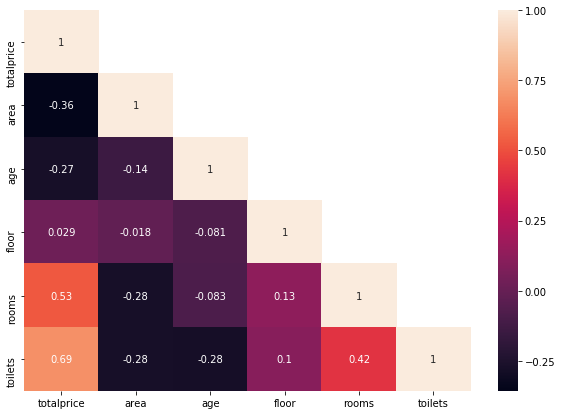

In [14]:
# Make heatmap of each variable correlation
plt.figure(figsize = (10,7))
corr = data_numerical.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, mask = mask, annot = True)

From the correlation above, it is found that the variables that are quite influential are toilets, rooms, age and area.

## 4. Variables Selection

Based on the box plot and the correlation of each variable above, the variables chosen to make the model are area, category, age, rooms, conservation, toilets, garage, elevator,streetcategory, heating, tras.

In [15]:
# Separate dataset to predictors and respon
y = data["totalprice"]
x = data.drop(["totalprice", "zone", "out", "floor"], axis = 1)

In [16]:
# Make dummies data for categorical variables
data1 = pd.get_dummies(x,drop_first=True)
data1.head()

,area,age,rooms,toilets,garage,elevator,tras,category_2B,category_3A,category_3B,...,category_4B,category_5A,streetcategory_S3,streetcategory_S4,streetcategory_S5,heating_3A,heating_3B,heating_4A,newconservation_B,newconservation_C
0,7.531000e+09,33,5,1,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1,1.006500e+09,5,5,2,1,1,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,8.887000e+09,14,5,2,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,6.261000e+09,41,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1.461500e+09,22,7,2,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0


## 5. Modeling

In [17]:
# Import library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
linreg = LinearRegression()

In [18]:
#Split data to train and test
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size = 0.2, random_state = 0)

In [19]:
# Make regression model
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# Make prediction
y_pred = linreg.predict(x_test)
y_pred

array([241584.59651123, 285115.39664735, 293186.63729875, 240278.54846503,
       347573.35267433, 301249.69654912, 314735.25559198, 296971.415986  ,
       278900.16738021, 233366.77205579, 198147.48193631, 239025.90988326,
       313890.18135091, 195211.85271732, 321818.7236949 , 245905.20320054,
       307700.50256618, 300824.41827212, 385687.15569513, 290803.50805175,
       273623.67635816, 363204.7787143 , 348801.33436489, 194959.93281515,
       362052.70375969, 189523.44490319, 257419.83684953, 253065.34869781,
       185625.8546687 , 326024.24888857, 228785.63509256, 196120.06444469,
       265394.12647039, 326142.34865174, 266175.18776404, 328098.44994931,
       251434.18462834, 353994.31886509, 390943.34699352, 250560.08802485,
       252980.06148793, 274984.6883361 , 247659.34005712, 376901.87108543])

## 6. Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only

In [21]:
# Make a function to calculate the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
from sklearn.metrics import mean_absolute_error
print(f'Nilai MAE {mean_absolute_error(y_pred, y_test)}')
print(f'Nilai MAPE {mean_absolute_percentage_error(y_test, y_pred)}')

Nilai MAE 28976.675270636344
Nilai MAPE 10.149829313007166


## 7. Conclusion

Tony can predict apartment prices in Victoria by using a regression model that has been created using the variables that have been selected with MAE and MAPE values of model are 28976.68 and 10.15, respectively. So it can be said that the mean absolute error/gap from the prediction of apartment prices made by toni with the actual apartment prices is 28976.68.